In [1]:
# Mengimpor library 

import pandas as pd
import numpy as np 
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [2]:
# Menampilkan data

dP = pd.read_csv('monitoringdata.csv')
dP


,Agency,Region,siteName,SiteID,LawaSiteID,siteType,Latitude,Longitude,Property,DateCollected,Resample following exceedance?,Value,SwimIcon,SwimmingGuidelinesTestResultDescription
0,Bay of Plenty Regional Council,Bay of Plenty region,FK325034,Lake Okareka at Steep St Reserve,EBOP-10005,Lake,-38.167698,176.347488,E-coli,10/25/2017 12:00,NaN,25.0,green,Suitable for swimming
1,Bay of Plenty Regional Council,Bay of Plenty region,FK325034,Lake Okareka at Steep St Reserve,EBOP-10005,Lake,-38.167698,176.347488,E-coli,10/29/2017 12:00,NaN,2.0,green,Suitable for swimming
2,Bay of Plenty Regional Council,Bay of Plenty region,FK325034,Lake Okareka at Steep St Reserve,EBOP-10005,Lake,-38.167698,176.347488,E-coli,11/5/2017 12:00,NaN,1.0,green,Suitable for swimming
3,Bay of Plenty Regional Council,Bay of Plenty region,FK325034,Lake Okareka at Steep St Reserve,EBOP-10005,Lake,-38.167698,176.347488,E-coli,11/13/2017 0:19,NaN,5.0,green,Suitable for swimming
4,Bay of Plenty Regional Council,Bay of Plenty region,FK325034,Lake Okareka at Steep St Reserve,EBOP-10005,Lake,-38.167698,176.347488,E-coli,11/19/2017 22:34,NaN,2.0,green,Suitable for swimming
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70881,West Coast Regional Council,West Coast region,Seven.Mile.Ck...SH6.Rapahoe,Seven Mile Ck @ SH6 Rapahoe,WCRC-00012,River,-42.376147,171.242946,E-coli,1/25/2022 8:10,NaN,40.0,green,Suitable for swimming
70882,West Coast Regional Council,West Coast region,Seven.Mile.Ck...SH6.Rapahoe,Seven Mile Ck @ SH6 Rapahoe,WCRC-00012,River,-42.376147,171.242946,E-coli,2/8/2022 7:15,NaN,150.0,green,Suitable for swimming
70883,West Coast Regional Council,West Coast region,Seven.Mile.Ck...SH6.Rapahoe,Seven Mile Ck @ SH6 Rapahoe,WCRC-00012,River,-42.376147,171.242946,E-coli,2/21/2022 12:55,NaN,36.0,green,Suitable for swimming
70884,West Coast Regional Council,West Coast region,Seven.Mile.Ck...SH6.Rapahoe,Seven Mile Ck @ SH6 Rapahoe,WCRC-00012,River,-42.376147,171.242946,E-coli,3/2/2022 11:00,NaN,100.0,green,Suitable for swimming


In [3]:
# Telaah data statistik

dP.describe(Value)


,Latitude,Longitude,Resample following exceedance?,Value
count,70593.000000,70593.000000,56713.000000,70505.000000
mean,-40.518857,174.552563,0.045845,280.264216
std,2.548670,2.245759,0.209150,1846.779604
min,-46.898428,167.685997,0.000000,0.000000
25%,-41.331721,173.316279,0.000000,4.000000
50%,-40.369980,174.978790,0.000000,15.000000
75%,-38.699633,175.903158,0.000000,110.000000
max,-34.823295,178.335338,1.000000,200000.000000


In [4]:
# Melihat informasi data

dP.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70886 entries, 0 to 70885
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Agency                                   70886 non-null  object 
 1   Region                                   70886 non-null  object 
 2   siteName                                 70886 non-null  object 
 3   SiteID                                   70886 non-null  object 
 4   LawaSiteID                               70886 non-null  object 
 5   siteType                                 70886 non-null  object 
 6   Latitude                                 70593 non-null  float64
 7   Longitude                                70593 non-null  float64
 8   Property                                 70886 non-null  object 
 9   DateCollected                            70886 non-null  object 
 10  Resample following exceedance?           56713


Visualisasi


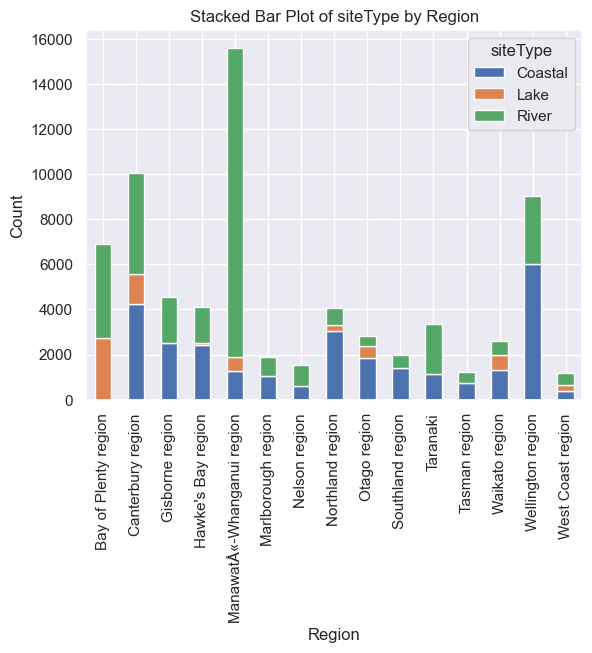

In [5]:

import matplotlib.pyplot as plt

# Menghitung jumlah data berdasarkan 'Region' dan 'siteType'
counts = dP.groupby(['Region', 'siteType']).size().unstack()

# Visualisasi stacked bar plot
counts.plot(kind='bar', stacked=True)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of siteType by Region')
plt.legend(title='siteType')
plt.show()


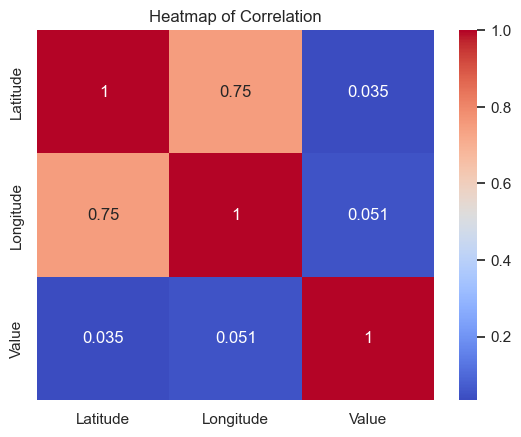

In [6]:
import seaborn as sns

# Menghitung korelasi antara kolom numerik
corr_matrix = dP[['Latitude', 'Longitude', 'Value']].corr()

# Visualisasi heatmap dari korelasi
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation')
plt.show()


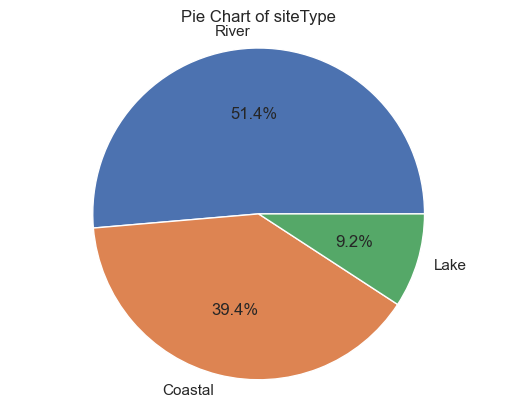

In [7]:
import matplotlib.pyplot as plt

# Menghitung jumlah data berdasarkan 'siteType'
siteType_counts = dP['siteType'].value_counts()

# Visualisasi pie chart
plt.pie(siteType_counts.values, labels=siteType_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart of siteType')
plt.axis('equal')
plt.show()


In [8]:
# DATA PREPARATION (Cleansing)

dP.isnull().sum()


Agency                                         0
Region                                         0
siteName                                       0
SiteID                                         0
LawaSiteID                                     0
siteType                                       0
Latitude                                     293
Longitude                                    293
Property                                       0
DateCollected                                  0
Resample following exceedance?             14173
Value                                        381
SwimIcon                                     381
SwimmingGuidelinesTestResultDescription     2545
dtype: int64

In [9]:
# Menghapus variabel yang tidak dibutuhkan 

dP1 =dP.drop(columns=['Agency', 'SiteID', 'LawaSiteID', 'Resample following exceedance?', 'DateCollected', 'SwimmingGuidelinesTestResultDescription', 'Region', 'siteName'])
dP1


,siteType,Latitude,Longitude,Property,Value,SwimIcon
0,Lake,-38.167698,176.347488,E-coli,25.0,green
1,Lake,-38.167698,176.347488,E-coli,2.0,green
2,Lake,-38.167698,176.347488,E-coli,1.0,green
3,Lake,-38.167698,176.347488,E-coli,5.0,green
4,Lake,-38.167698,176.347488,E-coli,2.0,green
...,...,...,...,...,...,...
70881,River,-42.376147,171.242946,E-coli,40.0,green
70882,River,-42.376147,171.242946,E-coli,150.0,green
70883,River,-42.376147,171.242946,E-coli,36.0,green
70884,River,-42.376147,171.242946,E-coli,100.0,green


In [10]:
# Melihat informasi data 

dP1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70886 entries, 0 to 70885
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   siteType   70886 non-null  object 
 1   Latitude   70593 non-null  float64
 2   Longitude  70593 non-null  float64
 3   Property   70886 non-null  object 
 4   Value      70505 non-null  float64
 5   SwimIcon   70505 non-null  object 
dtypes: float64(3), object(3)
memory usage: 3.2+ MB


In [11]:
# Menghapus semua baris duplikasi kecuali salah satunya

dP1.drop_duplicates(inplace=True)


In [12]:
# Mengecek data 

Cek_Data = pd.DataFrame({
    'Data Kosong': dP1.isnull().sum(),
    'Data Duplikat': dP1.duplicated().sum(),
    'Data NaNN': dP1.isna().sum(),
    'Type Data': dP1.dtypes})
Cek_Data


,Data Kosong,Data Duplikat,Data NaNN,Type Data
siteType,0,0,0,object
Latitude,134,0,134,float64
Longitude,134,0,134,float64
Property,0,0,0,object
Value,47,0,47,float64
SwimIcon,47,0,47,object


In [13]:
# Mengisi data kosong dengan nilai median

dP1['Value'] = dP1['Value'].fillna(dP1['Value'].median())
dP1['Latitude'] = dP1['Latitude'].fillna(dP1['Latitude'].median())
dP1['Longitude'] = dP1['Longitude'].fillna(dP1['Longitude'].median())

# Mengisi data kosong dengan nilai "No Data"

dP1['SwimIcon'] = dP1['SwimIcon'].fillna('No Data')


In [14]:
# Mengecek data 

Cek_Data = pd.DataFrame({
    'Data Kosong': dP1.isnull().sum(),
    'Data Duplikat': dP1.duplicated().sum(),
    'Data NaNN': dP1.isna().sum(),
    'Type Data': dP1.dtypes})
Cek_Data


,Data Kosong,Data Duplikat,Data NaNN,Type Data
siteType,0,0,0,object
Latitude,0,0,0,float64
Longitude,0,0,0,float64
Property,0,0,0,object
Value,0,0,0,float64
SwimIcon,0,0,0,object


In [15]:
# Melihat unique value 

for col in dP1.columns : 
    print('{:<20} => {:>5}'.format(col, len(dP1[col].unique())))
    

siteType             =>     3
Latitude             =>   625
Longitude            =>   625
Property             =>     3
Value                =>  1159
SwimIcon             =>     4


In [16]:
# Melihat Value dari masing-masing variabel 

Values_siteType = dP1["siteType"].value_counts().sort_values(ascending=False)
Values_Property = dP1["Property"].value_counts().sort_values(ascending=False)
Values_SwimIcon = dP1["SwimIcon"].value_counts().sort_values(ascending=False)

print("Values_siteType:")
print(Values_siteType)

print("\nValues_Property:")
print(Values_Property)

print("\nValues_SwimIcon:")
print(Values_SwimIcon)


Values_siteType:
River      16709
Coastal     8092
Lake        2331
Name: siteType, dtype: int64

Values_Property:
E-coli           19456
Enterococci       7244
Cyanobacteria      432
Name: Property, dtype: int64

Values_SwimIcon:
green      17855
red         5184
amber       3970
No Data      123
Name: SwimIcon, dtype: int64


In [17]:
# label mapping (mengubah nilai label)

label_mapping = {
    'siteType': {
        'River': 0,
        'Coastal': 1,
        'Lake': 2
    },
    'Property': {
        'E-coli': 0,
        'Enterococci': 1,
        'Cyanobacteria': 2
    },
    'SwimIcon': {
        'green': 0,
        'red': 1,
        'amber': 2,
        'No Data': 3
    }
}

# Mengganti nilai dalam kolom 'siteType' menggunakan label mapping

dP1['siteType'] = dP1['siteType'].map(label_mapping['siteType'])
dP1['Property'] = dP1['Property'].map(label_mapping['Property'])
dP1['SwimIcon'] = dP1['SwimIcon'].map(label_mapping['SwimIcon'])


# Regresi dan Klasifikasi

In [18]:
# Menampilkan data

data = dP1.copy()
data


,siteType,Latitude,Longitude,Property,Value,SwimIcon
0,2,-38.167698,176.347488,0,25.0,0
1,2,-38.167698,176.347488,0,2.0,0
2,2,-38.167698,176.347488,0,1.0,0
3,2,-38.167698,176.347488,0,5.0,0
5,2,-38.167698,176.347488,0,6.0,0
...,...,...,...,...,...,...
70876,0,-42.376147,171.242946,0,110.0,0
70877,0,-42.376147,171.242946,0,100.0,0
70880,0,-42.376147,171.242946,0,530.0,2
70883,0,-42.376147,171.242946,0,36.0,0


In [19]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

x = data.drop(columns=['SwimIcon'])
y = data['SwimIcon']

# Membagi dataset menjadi set data latihan (training set) dan set data uji (test set)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Transformasi data dengan Standard Scaler
columns = ['Value', 'Latitude', 'Longitude', 'siteType', 'Property']
scaler = StandardScaler()
x_train[columns] = scaler.fit_transform(x_train[columns])
x_test[columns] = scaler.transform(x_test[columns])

# TRANSFORMASI Y TRAIN
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

y_train


array([0, 0, 0, ..., 0, 0, 2], dtype=int64)

# REGRESI

In [20]:
# Mengimpor library 

from sklearn.linear_model import LogisticRegression
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score 
from sklearn.metrics import classification_report


In [21]:
# Melakukan prediksi pada data uji

logreg = LogisticRegression(multi_class='auto', solver='lbfgs')
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

print("Accuracy_Score : %.2f "% accuracy_score(y_test,y_pred))
print("MSE : %.2f "% mean_squared_error(y_test,y_pred))
print("MAE : %.2f "% mean_absolute_error(y_test,y_pred))
print("RMSE : %.2f "% math.sqrt(mean_squared_error(y_test,y_pred)))
print("r_score : %.2f "% r2_score(y_test,y_pred))


Accuracy_Score : 0.95 
MSE : 0.18 
MAE : 0.09 
RMSE : 0.43 
r_score : 0.69 


c:\Users\ACER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:

confusion_matrix(y_test, y_pred)


array([[3516,    0,    0,    0],
       [  19,  975,   45,    0],
       [ 188,    0,  662,    0],
       [  18,    4,    0,    0]], dtype=int64)

# Kasifikasi

In [23]:
# KLASIFIKASI DENGAN KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
KNN = KNeighborsClassifier()

KNN.fit(x_train, y_train)
y_pred6 = KNN.predict(x_test)
score6 = metrics.accuracy_score(y_test, y_pred6)
print("Akurasi dengan menggunakan KNN: ", score6)


Akurasi dengan menggunakan KNN:  0.9572507831214299


In [24]:
# Predict 

y_pred6 = KNN.predict(x_test)
print('Classification Report Test Model (KNeighborsClassifier) :')
print(classification_report(y_test, y_pred6))


Classification Report Test Model (KNeighborsClassifier) :
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      3516
           1       0.98      0.93      0.96      1039
           2       0.91      0.88      0.89       850
           3       0.36      0.18      0.24        22

    accuracy                           0.96      5427
   macro avg       0.80      0.74      0.77      5427
weighted avg       0.96      0.96      0.96      5427



In [25]:
# Klasifikasi dengan Decision Tree 

from sklearn.tree import DecisionTreeClassifier
DTR = DecisionTreeClassifier()

DTR.fit(x_train, y_train)
y_pred7 = DTR.predict(x_test)
score7 = metrics.accuracy_score(y_test, y_pred7)
print("Akurasi dengan menggunakan Decision Tree: ", score7)


Akurasi dengan menggunakan Decision Tree:  0.9987101529390087


In [26]:
# Predict

y_pred7 = DTR.predict(x_test)
print('Classification Report Test Model (DecisionTree) :')
print(classification_report(y_test, y_pred7))


Classification Report Test Model (DecisionTree) :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3516
           1       1.00      1.00      1.00      1039
           2       1.00      1.00      1.00       850
           3       0.86      0.82      0.84        22

    accuracy                           1.00      5427
   macro avg       0.96      0.95      0.96      5427
weighted avg       1.00      1.00      1.00      5427



In [27]:
# Klasifikasi dengan Random Forest

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

rfc.fit(x_train, y_train)
y_pred8 = rfc.predict(x_test)
score8 = metrics.accuracy_score(y_test, y_pred8)
print("Akurasi dengan menggunakan Random Forest: ", score8)


Akurasi dengan menggunakan Random Forest:  0.9985258890731528


In [28]:
# Predict

y_pred8 = rfc.predict(x_test)
print('Classification Report Test Model (Random Forest) :')
print(classification_report(y_test, y_pred8))


Classification Report Test Model (Random Forest) :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3516
           1       1.00      1.00      1.00      1039
           2       1.00      1.00      1.00       850
           3       0.86      0.82      0.84        22

    accuracy                           1.00      5427
   macro avg       0.96      0.95      0.96      5427
weighted avg       1.00      1.00      1.00      5427



In [29]:
# Klasifikasi dengan Support Vector Machine

from sklearn.svm import SVC
from sklearn import metrics

svm = SVC()

svm.fit(x_train, y_train)
y_pred9 = svm.predict(x_test)
score9 = metrics.accuracy_score(y_test, y_pred9)
print("Akurasi dengan menggunakan Support Vector Machine: ", score9)


Akurasi dengan menggunakan Support Vector Machine:  0.9045513174866409


In [30]:
# Predict

y_pred9 = svm.predict(x_test)
print('Classification Report Test Model (Support Vector Machine) :')
print(classification_report(y_test, y_pred9))


Classification Report Test Model (Support Vector Machine) :
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      3516
           1       1.00      0.86      0.93      1039
           2       0.83      0.58      0.69       850
           3       0.00      0.00      0.00        22

    accuracy                           0.90      5427
   macro avg       0.68      0.61      0.64      5427
weighted avg       0.90      0.90      0.90      5427



c:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
# SVM dengan kernel RBF, nilai parameter C dan gamma dapat diubah juga 

svmRBF = SVC(kernel = 'rbf', C = 1, gamma = 0.01,)

svmRBF.fit(x_train, y_train)
y_pred91 = svmRBF.predict(x_test)
score91 = metrics.accuracy_score(y_test, y_pred91)
print("Akurasi dengan menggunakan Support Vector Machine RBF Kernel: ", score91)


Akurasi dengan menggunakan Support Vector Machine RBF Kernel:  0.7770407223143542


In [32]:
# Predict

y_pred91 = svmRBF.predict(x_test)
print('Classification Report Test Model (Support Vector Machine RBF Kernel) :')
print(classification_report(y_test, y_pred91))


Classification Report Test Model (Support Vector Machine RBF Kernel) :
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      3516
           1       1.00      0.67      0.81      1039
           2       0.00      0.00      0.00       850
           3       0.00      0.00      0.00        22

    accuracy                           0.78      5427
   macro avg       0.44      0.42      0.41      5427
weighted avg       0.67      0.78      0.71      5427



c:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Membangun model ANN

In [33]:
# Memanggil data

data1 = dP1.copy()


In [34]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

x = data.drop(columns=['SwimIcon'])
y = data['SwimIcon']

# Membagi dataset menjadi set data latihan (training set) dan set data uji (test set)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Transformasi data dengan Standard Scaler
columns = ['Value', 'Latitude', 'Longitude', 'siteType', 'Property']
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train[columns])
x_test_scale = scaler.transform(x_test[columns])

x_train[columns]=x_train_scale
x_test[columns]=x_test_scale

# TRANSFORMASI Y TRAIN
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)


In [35]:
# Melabelkan

from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, num_classes = 5)
y_test = np_utils.to_categorical(y_test, num_classes = 5)


In [36]:
# Melihat Shape

x_train.shape, x_test.shape, y_train.shape, y_test.shape


((21705, 5), (5427, 5), (21705, 5), (5427, 5))

In [62]:
# Mengimport library 

import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [38]:
# Membangun model ANN

import tensorflow as tf

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=32, activation="relu", input_shape=(5,)))
ann.add(tf.keras.layers.Dense(units=128, activation="relu"))
ann.add(tf.keras.layers.Dense(units=32, activation="relu"))
ann.add(tf.keras.layers.Dense(units=5, activation="softmax"))

ann.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])


In [39]:
# Melihat summary

ann.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                192       
                                                                 
 dense_1 (Dense)             (None, 128)               4224      
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 5)                 165       
                                                                 
Total params: 8,709
Trainable params: 8,709
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Fitting ANN

history =ann.fit(x_train,y_train,batch_size=32,epochs = 100,validation_data=(x_test, y_test))


Epoch 1/100
679/679 [==============================] - 10s 7ms/step - loss: 0.3825 - accuracy: 0.8639 - val_loss: 0.1499 - val_accuracy: 0.9469
Epoch 2/100
679/679 [==============================] - 4s 6ms/step - loss: 0.1213 - accuracy: 0.9575 - val_loss: 0.1076 - val_accuracy: 0.9641
Epoch 3/100
679/679 [==============================] - 2s 3ms/step - loss: 0.0993 - accuracy: 0.9626 - val_loss: 0.0926 - val_accuracy: 0.9676
Epoch 4/100
679/679 [==============================] - 2s 3ms/step - loss: 0.0899 - accuracy: 0.9679 - val_loss: 0.0737 - val_accuracy: 0.9725
Epoch 5/100
679/679 [==============================] - 2s 3ms/step - loss: 0.0811 - accuracy: 0.9712 - val_loss: 0.0884 - val_accuracy: 0.9644
Epoch 6/100
679/679 [==============================] - 2s 3ms/step - loss: 0.0806 - accuracy: 0.9689 - val_loss: 0.0820 - val_accuracy: 0.9654
Epoch 7/100
679/679 [==============================] - 3s 4ms/step - loss: 0.0741 - accuracy: 0.9716 - val_loss: 0.0809 - val_accuracy: 0.969

In [41]:
# Melakukan evaluasi 

evaluation = ann.evaluate(x_test, y_test)


170/170 [==============================] - 1s 6ms/step - loss: 0.0433 - accuracy: 0.9816


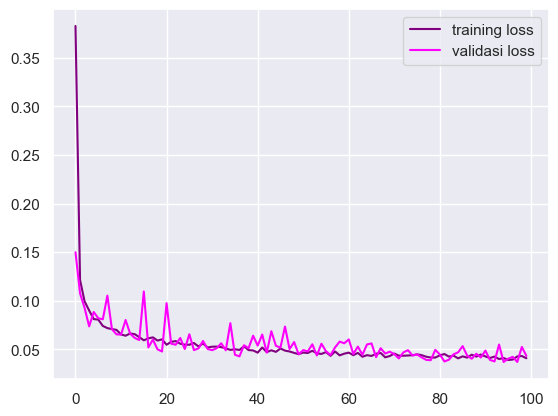

In [42]:
# Visualisasi loss

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss, label = 'training loss',color='purple')
plt.plot(val_loss, label = 'validasi loss',color='magenta')
plt.legend()


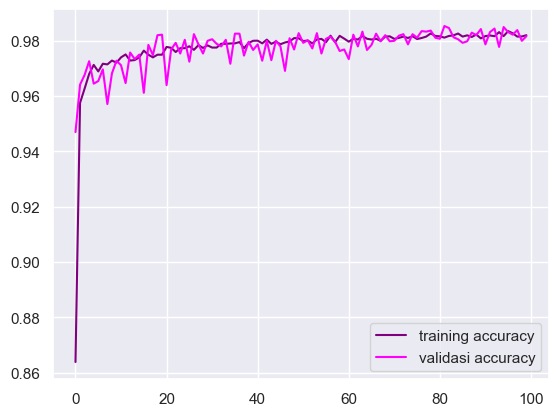

In [43]:
# Visualisasi akurasi

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(accuracy, label = 'training accuracy',color='purple')
plt.plot(val_accuracy, label = 'validasi accuracy',color='magenta')
plt.legend()


In [44]:

ann_predict = np.argmax(ann.predict(x_test),axis=1)
y_test = np.argmax(y_test,axis=1)


170/170 [==============================] - 2s 3ms/step


In [45]:

print('Classification Report Test Model (ANN) :')
print(classification_report(y_test, ann_predict))


Classification Report Test Model (ANN) :
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3516
           1       1.00      0.97      0.98      1039
           2       0.97      0.95      0.96       850
           3       0.50      0.50      0.50        22

    accuracy                           0.98      5427
   macro avg       0.86      0.85      0.86      5427
weighted avg       0.98      0.98      0.98      5427



In [46]:
# Evaluasi model ANN dengan confusion matrix

cm = confusion_matrix(y_test, ann_predict)
cm


array([[3501,    0,    8,    7],
       [  17, 1006,   14,    2],
       [  39,    0,  809,    2],
       [  11,    0,    0,   11]], dtype=int64)

# Clustering

In [47]:
# Memanggil data 

data=dP1.copy()


In [48]:
# Transformasi data dengan Standard Scaler

columns = ['Value', 'Latitude', 'Longitude'] 
scl = StandardScaler()
X_scl = scl.fit_transform(data[columns])
X_scl = scl.transform(data[columns])

data[columns]=X_scl
data[columns]=X_scl


In [49]:
# Menampilkan data 

data


,siteType,Latitude,Longitude,Property,Value,SwimIcon
0,2,0.908574,0.739143,0,-0.207308,0
1,2,0.908574,0.739143,0,-0.215333,0
2,2,0.908574,0.739143,0,-0.215682,0
3,2,0.908574,0.739143,0,-0.214286,0
5,2,0.908574,0.739143,0,-0.213937,0
...,...,...,...,...,...,...
70876,0,-0.738656,-1.389586,0,-0.177652,0
70877,0,-0.738656,-1.389586,0,-0.181141,0
70880,0,-0.738656,-1.389586,0,-0.031116,2
70883,0,-0.738656,-1.389586,0,-0.203470,0


In [50]:
# Mengambil subset data dari DataFrame

X = data.iloc[:,[1,2,4]].values


In [51]:
# Mengubah variabel X menjadi array NumPy

X = np.asarray(X)
print(X)


[[ 0.90857426  0.7391427  -0.207308  ]
 [ 0.90857426  0.7391427  -0.21533261]
 [ 0.90857426  0.7391427  -0.21568151]
 ...
 [-0.73865628 -1.38958571 -0.0311155 ]
 [-0.73865628 -1.38958571 -0.20347015]
 [-0.73865628 -1.38958571 -0.12182847]]


c:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_k

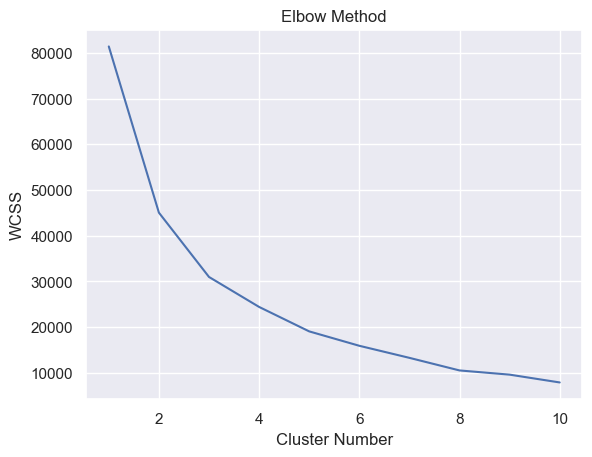

In [52]:
# Optimasi K-Means dengan metode elbow untuk menentukan jumlah klaster yang tepat

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Cluster Number')
plt.ylabel('WCSS')
plt.show()


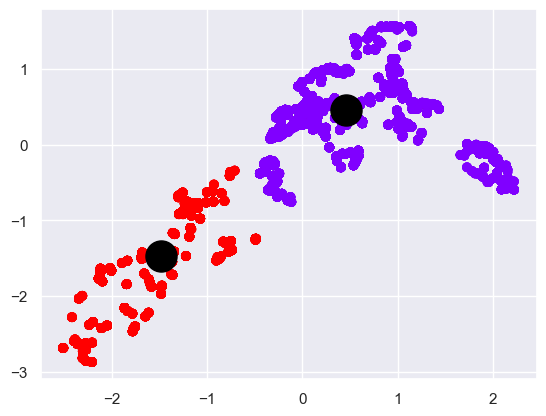

In [53]:
# Proses K-Means Kluster

kmeans = KMeans(n_clusters=2,init='k-means++',
               max_iter=500,n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],
           kmeans.cluster_centers_[:,1],s=500, c="black")
plt.show()


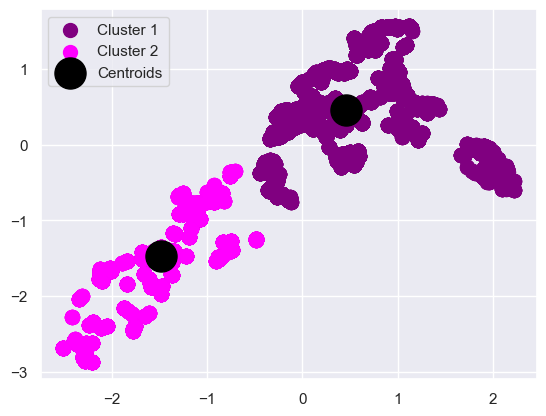

In [54]:
# Visualisasi hasil clusters

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'magenta', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 500, c = 'black', label = 'Centroids')
plt.legend()
plt.show()


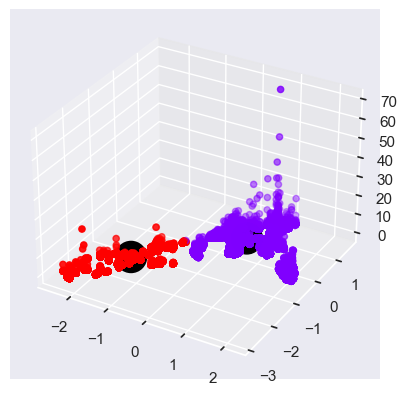

In [55]:
# Visualisasi scatter plot 3D 

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=kmeans.labels_, cmap='rainbow')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           kmeans.cluster_centers_[:, 2], c='black', s=500, alpha=1)
plt.show()


In [56]:
import pickle

# Save the model to a file

with open('dtr.pkl', 'wb') as file:
    pickle.dump(DTR, file)
    

In [57]:
# Pickle Scaler model

pickle.dump(scaler, open("Sc.pkl", "wb"))
